In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp

In [2]:
survey_length = 0.3 # days
def generate_scheduler():
    # Define what we want the final visit ratio map to look like
    filtername = 'r'

    target_map = fs.standard_goals()[filtername]

    # Set up basis functions
    bfs = []
    bfs.append(fs.M5_diff_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(target_map=target_map, filtername=filtername, out_of_bounds_val=hp.UNSEEN))
    bfs.append(fs.North_south_patch_basis_function(zenith_min_alt=50.))
    bfs.append(fs.Slewtime_basis_function(filtername=filtername))

    # Weights for basis functions
    weights = np.array([1, 0.2, 1., 2.])
    survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername)
    scheduler = fs.Core_scheduler([survey])
    return scheduler

In [3]:
sched1 = generate_scheduler()

In [4]:
# Run the survey
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, sched1,
                                                     survey_length=survey_length,
                                                     filename=None,
                                                     delete_past=True)


/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 97.8%Completed 656 observations


In [5]:
sched2 = generate_scheduler()

In [6]:
sched2 = fs.warm_start(sched2, observations)

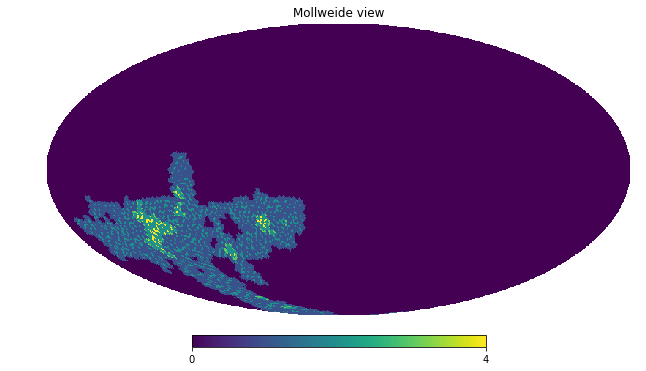

In [22]:
hp.mollview(sched2.surveys[0].basis_functions[1].survey_features['N_obs'].feature)

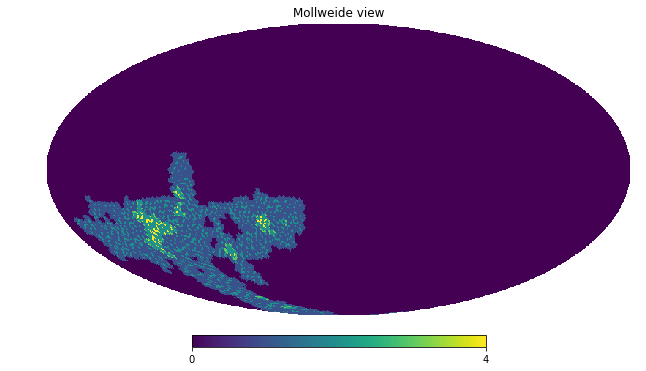

In [23]:
hp.mollview(sched1.surveys[0].basis_functions[1].survey_features['N_obs'].feature)

In [20]:
sched2.surveys[0].basis_functions[1].survey_features['N_obs_count_all'].feature

656

In [21]:
sched1.surveys[0].basis_functions[1].survey_features['N_obs_count_all'].feature

656